<a href="https://colab.research.google.com/github/chayhuixiang/tensorflow-starter/blob/main/6%20-%20Convolutional%20Neural%20Networks%20-%20CNNs/3_CNN_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# The Data
As compared to mnist, the cifar10 dataset has 3 color channels

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

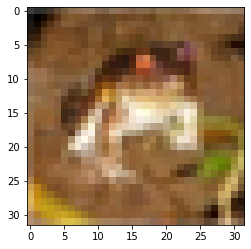

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Normalising
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
# Convert y_test to one hot
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

# Creating and Training the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# Take note of the input shape here, theres 3 channels now
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Input shape determined with model.summary() as shown below
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(14,14,32),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# keras.io/metrics to find out what metrics are available

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 22s 7ms/step - loss: 1.4970 - accuracy: 0.4566 - val_loss: 1.3084 - val_accuracy: 0.5444
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1698 - accuracy: 0.5872 - val_loss: 1.1465 - val_accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0328 - accuracy: 0.6373 - val_loss: 1.0209 - val_accuracy: 0.6459
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9214 - accuracy: 0.6757 - val_loss: 1.0009 - val_accuracy: 0.6538
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8319 - accuracy: 0.7092 - val_loss: 1.0198 - val_accuracy: 0.6520


# Model Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)

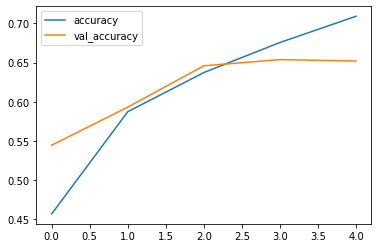

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

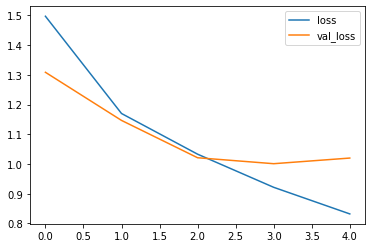

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0198242664337158, 0.6520000100135803]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
preds = model.predict(x_test) # (n_images, n_class)
predictions = np.argmax(preds , axis=1)  # (n_images,)

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       827
           1       0.62      0.90      0.74       694
           2       0.48      0.62      0.54       772
           3       0.62      0.42      0.50      1481
           4       0.61      0.56      0.58      1074
           5       0.43      0.66      0.52       650
           6       0.68      0.78      0.73       876
           7       0.79      0.62      0.69      1281
           8       0.85      0.71      0.77      1202
           9       0.79      0.69      0.74      1143

    accuracy                           0.65     10000
   macro avg       0.65      0.67      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[653   7  54  32  22   8  11  27 143  43]
 [ 33 623  14  22  13   5  14  21  67 188]
 [ 49   2 477 125 159  48  59  54  22   5]
 [ 14   4  56 620  64  85  35  79  23  20]
 [ 14   3  38 113 606  17  37 141  24   7]
 [  8   1  50 332  45 427  17  95  10  15]
 [  3   4  35 128  88  16 682  26   7  11]
 [  6   0  29  58  56  35   5 791   6  14]
 [ 22  11  12  18  12   5   5  16 850  49]
 [ 25  39   7  33   9   4  11  31  50 791]]


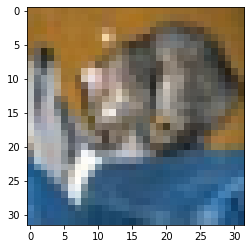

In [ ]:
my_number = x_test[0]
my_number.shape
plt.imshow(my_number.reshape(32,32,3))

In [ ]:
preds = model.predict(my_number.reshape(1,32,32,3)) # (n_images, n_class)
y_classes = np.argmax(preds , axis=1)  # (n_images,)
y_classes

array([3])

In [ ]:
y_test[0]

array([3], dtype=uint8)